Using RK-4 to solve for the Resonant frequency for a non-linear Forced Pendulum

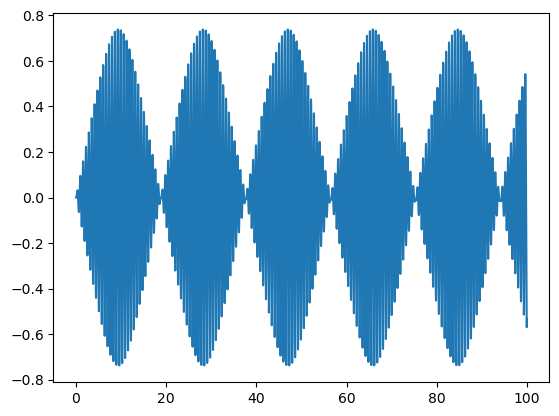

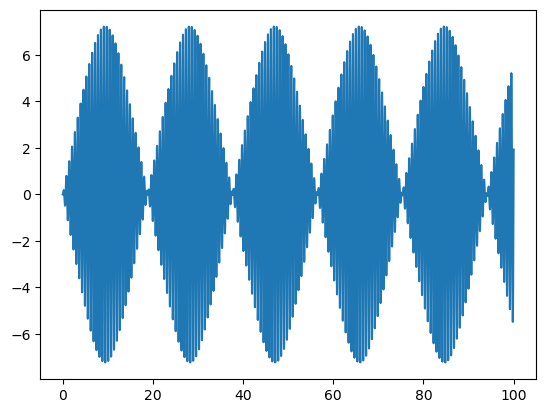

In [4]:
from typing import *
import math
import numpy as np
import matplotlib.pyplot as plt

#constants
g = 9.81
l = 0.1
w = 10
C = 2

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*math.sin(theta) + C*math.cos(theta)*math.sin(w*t)
    return np.array([ftheta,fomega],float)

#start and stop point and stepsize
a = 0.0
b = 100.0
N = 100000
h = (b-a)/N

tpoints = np.arange(a,b,h)
theta_points = []
omega_points = []

#initial condition
r = np.array([0.0,0.0], float)

# Range-Kutta, Fourth Order
for t in tpoints:
    theta_points.append(r[0])
    omega_points.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints, theta_points)
plt.show()

plt.plot(tpoints, omega_points)
plt.show()